Column names: Index(['Name', 'Description', 'GTEX-N7MS-0007-SM-2D7W1',
       'GTEX-N7MS-0008-SM-4E3JI', 'GTEX-N7MS-0011-R10A-SM-2HMJK',
       'GTEX-N7MS-0011-R11A-SM-2HMJS', 'GTEX-N7MS-0011-R1a-SM-2HMJG',
       'GTEX-N7MS-0011-R2a-SM-2HML6', 'GTEX-N7MS-0011-R3a-SM-33HC6',
       'GTEX-N7MS-0011-R4a-SM-2HMKW',
       ...
       'GTEX-XYKS-1626-SM-4BRUQ', 'GTEX-XYKS-1726-SM-4E3IO',
       'GTEX-XYKS-1826-SM-4E3JV', 'GTEX-XYKS-2126-SM-4E3IB',
       'GTEX-XYKS-2226-SM-4E3IU', 'GTEX-XYKS-2426-SM-4AT43',
       'GTEX-XYKS-2526-SM-4BOPX', 'GTEX-XYKS-2626-SM-4BRUT',
       'GTEX-XYKS-2726-SM-4E3IC', 'GTEX-Y8E5-0006-SM-47JWQ'],
      dtype='object', length=2923)
   GTEX-N7MS-0007-SM-2D7W1  GTEX-N7MS-0008-SM-4E3JI  \
0                  0.00000                 0.000000   
1                  2.95098                 1.536591   
2                  0.00000                 0.000000   
3                  0.00000                 0.000000   
4                  0.00000                 0.000000   

   

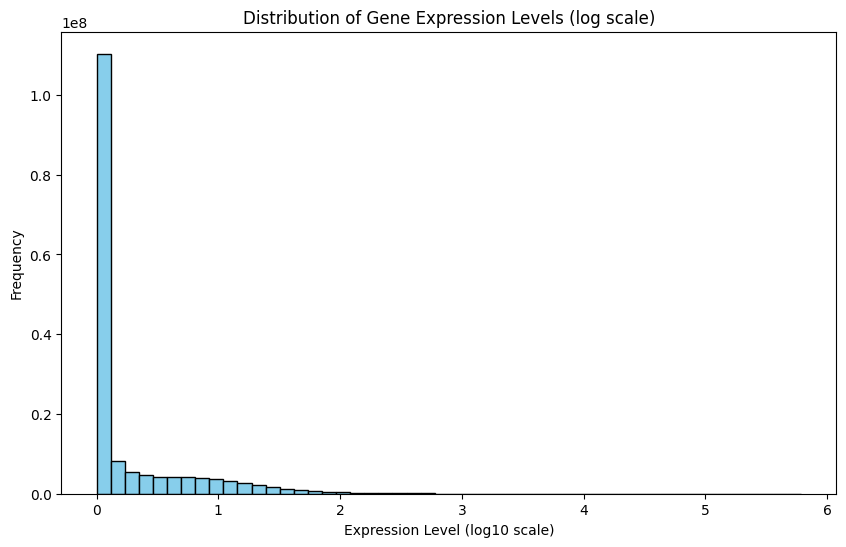

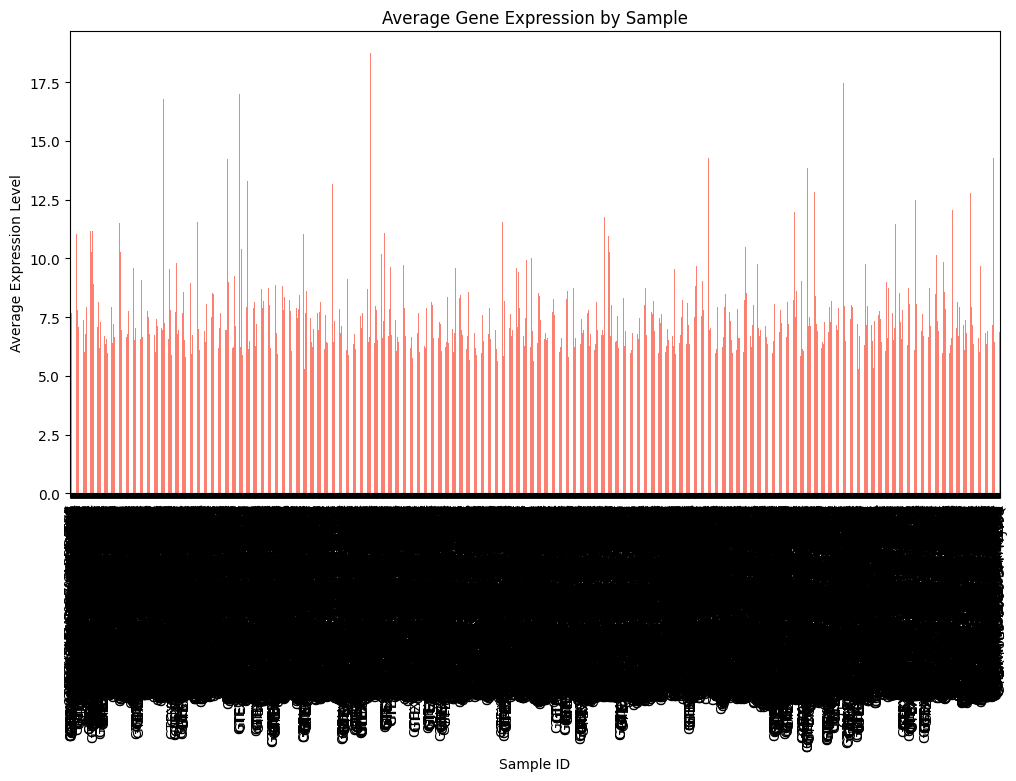

Number of expression values above the 99th percentile: 1635556


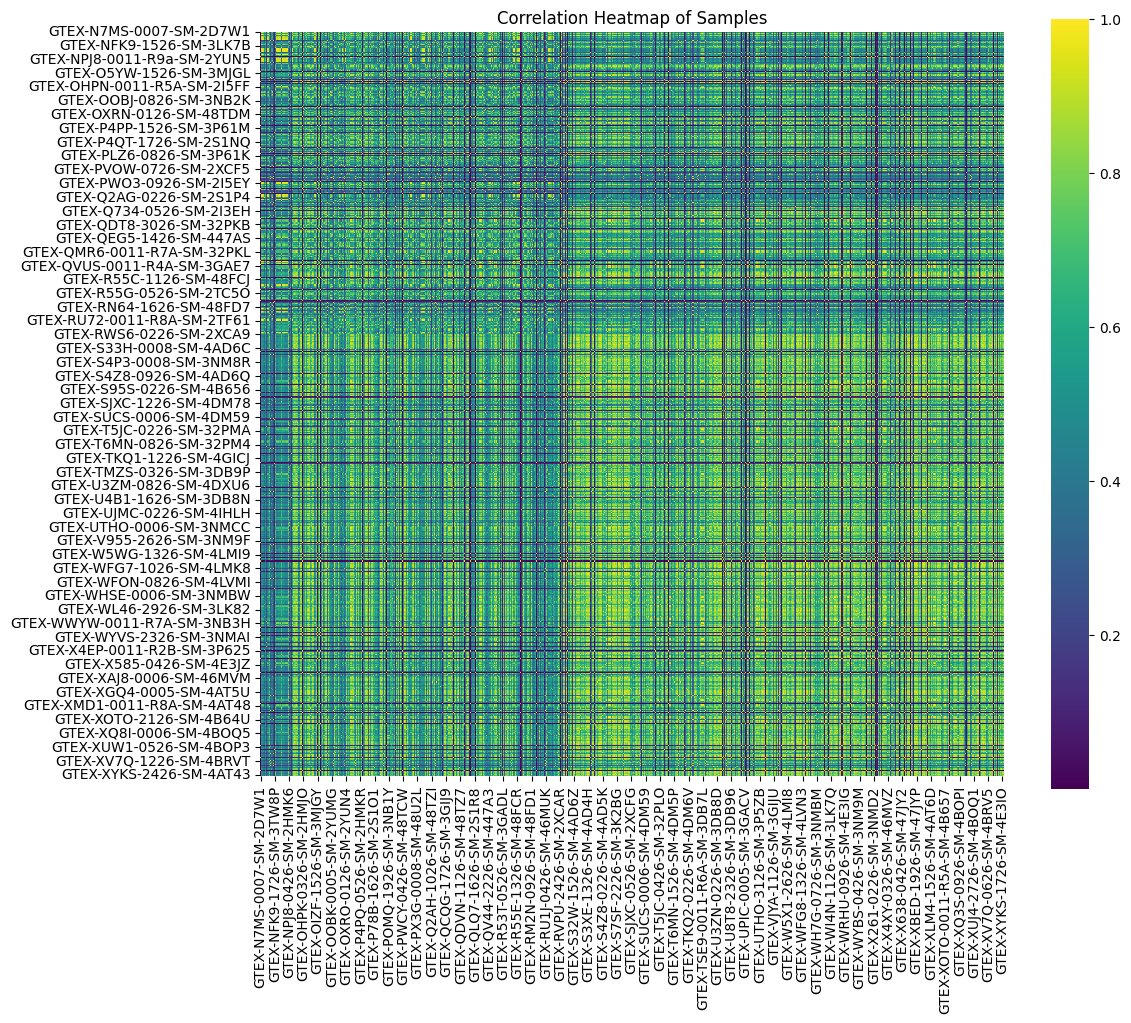

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the file path for the data
file_path = r"C:\Users\starw\OneDrive\바탕 화면\학교 생활\capstone project\GTEx_Analysis_2014-01-17_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct"

# Load the data (skip the first 2 metadata rows in the .gct file)
data = pd.read_csv(file_path, sep='\t', skiprows=2)

# Check column names
print("Column names:", data.columns)

# Drop non-numeric columns (assuming the first two columns are identifiers)
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data.head())

# Calculate basic statistics for gene expression levels
summary_stats = numeric_data.agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

# Visualize the distribution of gene expression levels (using log scale)
expression_values = numeric_data.values.flatten()
plt.figure(figsize=(10, 6))
plt.hist(np.log10(expression_values + 1), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Gene Expression Levels (log scale)")
plt.xlabel("Expression Level (log10 scale)")
plt.ylabel("Frequency")
plt.show()

# Calculate and visualize the average gene expression by sample
sample_means = numeric_data.mean()
plt.figure(figsize=(12, 6))
sample_means.plot(kind='bar', color='salmon')
plt.title("Average Gene Expression by Sample")
plt.xlabel("Sample ID")
plt.ylabel("Average Expression Level")
plt.xticks(rotation=90)
plt.show()

# Detect outliers in gene expression levels (using the top 1% threshold)
upper_threshold = np.quantile(expression_values, 0.99)
outliers = expression_values[expression_values > upper_threshold]
print(f"Number of expression values above the 99th percentile: {len(outliers)}")

# Generate a correlation heatmap between samples
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', square=True)
plt.title("Correlation Heatmap of Samples")
plt.show()



In [2]:
print(numeric_data.describe())

       GTEX-N7MS-0007-SM-2D7W1  GTEX-N7MS-0008-SM-4E3JI  \
count             55993.000000             55993.000000   
mean                 14.672317                 6.581537   
std                1565.397557                78.631960   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.326664                 0.593393   
max              282172.406250             10592.734375   

       GTEX-N7MS-0011-R10A-SM-2HMJK  GTEX-N7MS-0011-R11A-SM-2HMJS  \
count                  55993.000000                  55993.000000   
mean                       7.753273                      6.174047   
std                      242.328957                     80.791691   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.017065                   

In [ ]:
sample_means = numeric_data.mean()
sample_stds = numeric_data.std()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sample_means.plot(kind='bar', color='salmon')
plt.title("Average Gene Expression by Sample")
plt.xlabel("Sample ID")
plt.ylabel("Average Expression Level")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sample_stds.plot(kind='bar', color='skyblue')
plt.title("Standard Deviation of Gene Expression by Sample")
plt.xlabel("Sample ID")
plt.ylabel("Standard Deviation")
plt.xticks(rotation=90)
plt.show()